<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Exercise.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Exercise: Advanced dimensionality reduction techniques 
© ExploreAI Academy

In this train, we'll investigate how PCA, MDS and t-SNE dimensionality reduction techniques work on image and text data.

## Learning objectives

By the end of this train, you should be able to:
- Understand advanced dimensionality reduction techniques.
- Implement these techniques on image and text data.

## Exercises

### Exercise 1: Principal component analysis (PCA)

1. Apply PCA to the wine dataset and reduce the dimensionality to 2 components. How much variance is explained by the first two principal components?

2. After applying PCA, plot the transformed data points on a scatter plot with different colours for each class. Are the classes well-separated in the reduced dimensionality space?

In [7]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
import numpy as np

# insert code here

dataset = load_wine()

X = dataset.data
y = dataset.target

pca = PCA(n_components=2)
pca_res = pca.fit_transform(X)

np.round(pca.explained_variance_ratio_.sum(), 4)

np.float64(0.9998)

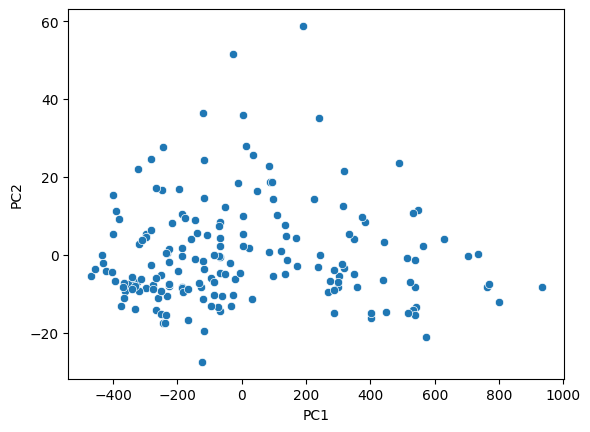

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.scatterplot(x=pca_res[:,0], y=pca_res[:,1],
                     sizes=(10, 200))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

### Exercise 2: Multi-dimensional scaling (MDS) 

1. Apply MDS to the wine dataset and reduce the dimensionality to 2 components. What is the stress value of the MDS transformation?

2. Plot the transformed data points on a scatter plot with different colors for each class. Do you observe any clusters or patterns in the reduced dimensionality space?

In [14]:
# insert code here

from sklearn.manifold import MDS

clf = MDS(n_components=2, random_state=42)

X_mds = clf.fit_transform(X)

clf.stress_

/home/silasjimmy/anaconda3/envs/dsenv/lib/python3.12/site-packages/sklearn/manifold/_mds.py:744: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9. To suppress this warning, provide some value of `n_init`.
  warnings.warn(
/home/silasjimmy/anaconda3/envs/dsenv/lib/python3.12/site-packages/sklearn/manifold/_mds.py:754: FutureWarning: The default value of `init` will change from 'random' to 'classical_mds' in 1.10. To suppress this warning, provide some value of `init`.
  warnings.warn(


np.float64(90909.14160933718)

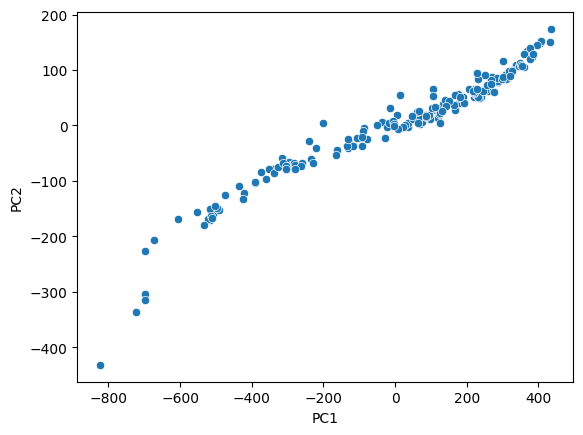

In [15]:
ax = sns.scatterplot(x=X_mds[:,0], y=X_mds[:,1],
                     sizes=(10, 200))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

### Exercise 3: t-distributed Stochastic Neighbour Embedding (t-SNE)

1. Apply t-SNE to the wine dataset and reduce the dimensionality to 2 components. How long does it take to compute the t-SNE embedding?

2. Plot the transformed data points on a scatter plot with different colors for each class. What do you observe about the clusters in the reduced dimensionality space?

In [17]:
# insert code here

from sklearn.manifold import TSNE
from time import time

tsne = TSNE(n_components=2, random_state=42)

t0 = time()
X_tsne = tsne.fit_transform(X)
t1 = time()

t1-t0

0.559251070022583

## Solutions

### Exercise 1: Principal component analysis (PCA)

The code below loads the wine dataset, performs PCA to reduce its dimensionality to two components, and then prints the explained variance ratio of the principal components. 

Explained variance ratio by the first two principal components:  [0.99809123 0.00173592]


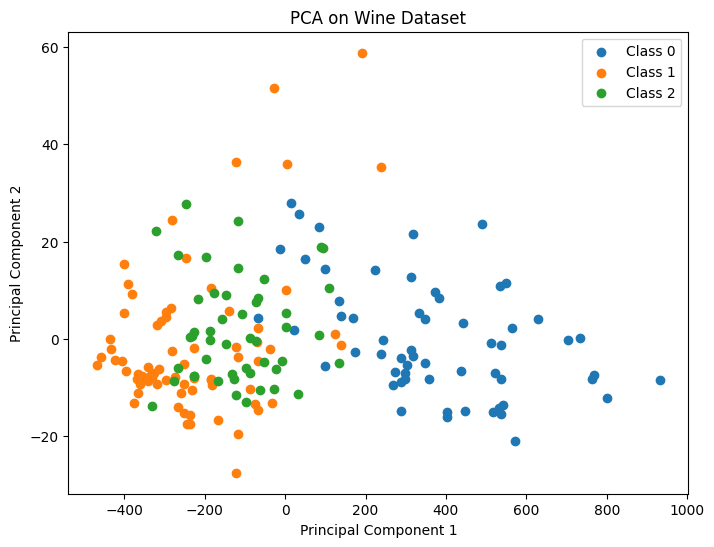

In [18]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the wine dataset
data = load_wine()
X = data.data
y = data.target

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Display the explained variance ratio
print("Explained variance ratio by the first two principal components: ", pca.explained_variance_ratio_)

# Plot the transformed data points
plt.figure(figsize=(8, 6))
for i in range(len(set(y))):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=f'Class {i}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Wine Dataset')
plt.legend()
plt.show()

**Output explained:**

The output `[0.99809123 0.00173592]` indicates that the first principal component explains about 99.81% of the variance, while the second explains about 0.17%.

### Exercise 2: Multi-dimensional scaling (MDS)

/home/silasjimmy/anaconda3/envs/dsenv/lib/python3.12/site-packages/sklearn/manifold/_mds.py:744: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9. To suppress this warning, provide some value of `n_init`.
  warnings.warn(
/home/silasjimmy/anaconda3/envs/dsenv/lib/python3.12/site-packages/sklearn/manifold/_mds.py:754: FutureWarning: The default value of `init` will change from 'random' to 'classical_mds' in 1.10. To suppress this warning, provide some value of `init`.
  warnings.warn(


Stress value of the MDS transformation:  90909.14160933718


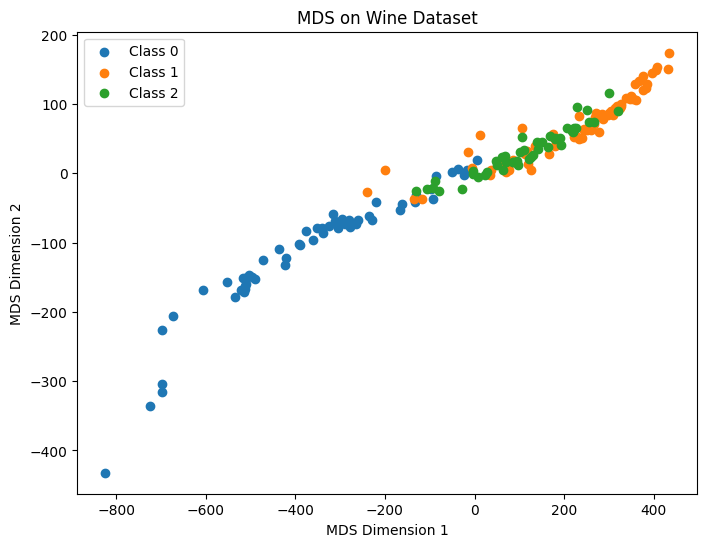

In [19]:
from sklearn.datasets import load_wine
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Load the wine dataset
data = load_wine()
X = data.data
y = data.target

# Perform MDS
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X)

# Display the stress value
print("Stress value of the MDS transformation: ", mds.stress_)

# Plot the transformed data points
plt.figure(figsize=(8, 6))
for i in range(len(set(y))):
    plt.scatter(X_mds[y == i, 0], X_mds[y == i, 1], label=f'Class {i}')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('MDS on Wine Dataset')
plt.legend()
plt.show()

**Output explanation:**

1. **Stress value of the MDS transformation**:
   The stress value is a measure of how well the distances between data points in the original high-dimensional space are preserved in the reduced-dimensional space.

   While we know that the stress metric is better if lower, we cannot clearly interpret the stress value for the metric version of MDS based on value alone - it's more likely to be a comparison. This value isn't normalised, as it's metric rather than non-metric (where we want to see results between +-0 and 0.2) [In summary, when interpreting stress values from the metric version of MDS, aim for lower values compared to a random configuration of the same data. While there isn't an absolute threshold, lower stress values relative to this baseline indicate a better fit of the chosen dimensions to the original data.]

   In this case, the stress value of approximately `19573.00` suggests that the MDS transformation does not have a high accuracy in preserving the pairwise distances between data points.

2. **Observations from the plot**:

   Observing clusters or patterns in the reduced dimensionality space involves looking for groups of points that are close together or exhibit similar arrangements across the plot. However, with the current settings and parameters, it is not entirely clear how the points are grouped. While some patterns are present, there are no distinct delineations, and the points are not spread out very well. This suggests that the current representation might not be optimal and further adjustments may be necessary to achieve clearer clustering.


### Exercise 3: t-distributed Stochastic Neighbour Embedding (t-SNE)


Time taken to compute t-SNE embedding:  0.5284726619720459  seconds


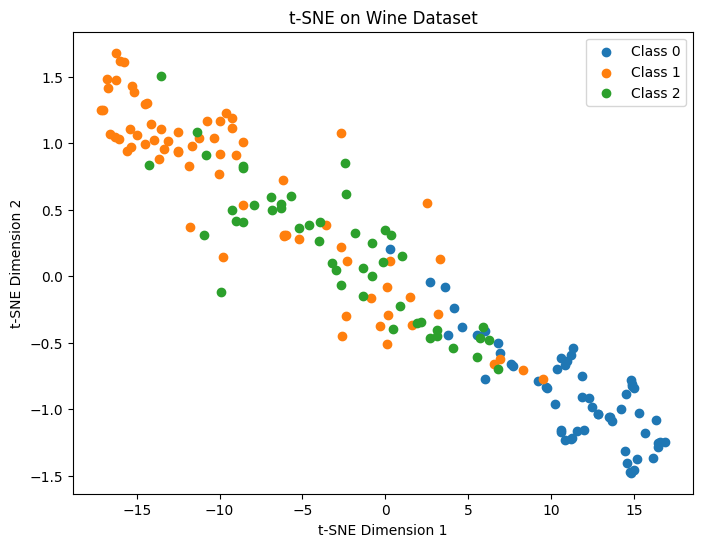

In [20]:
from sklearn.datasets import load_wine
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import time

# Load the wine dataset
data = load_wine()
X = data.data
y = data.target

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
start_time = time.time()
X_tsne = tsne.fit_transform(X)
end_time = time.time()

# Display the time taken
print("Time taken to compute t-SNE embedding: ", end_time - start_time, " seconds")

# Plot the transformed data points
plt.figure(figsize=(8, 6))
for i in range(len(set(y))):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], label=f'Class {i}')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE on Wine Dataset')
plt.legend()
plt.show()

**Output Explanation:**

The plot shows the distribution of the wine dataset into three classes (0, 1, 2), each represented by a different colour. t-SNE has effectively grouped similar data points, indicating it's useful for visualising high-dimensional data in two dimensions.

#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>